### Algorithms and Applications in Social Networks - HW1

Packages imports for all questions' code below:

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

### Q1
a. Implement the Watts–Strogatz model. Write a function that gets n, k and p
returns a random graph according to the model.

Running Example for n=10, k=4, p=0.5:
Watts-Storgatz Step 1:


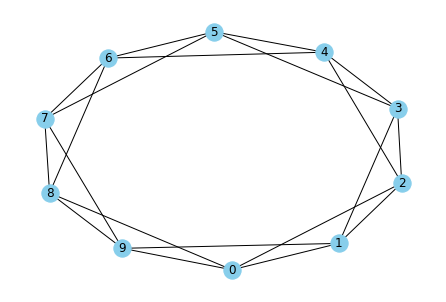

Watts-Storgatz Step 2 (FINAL):


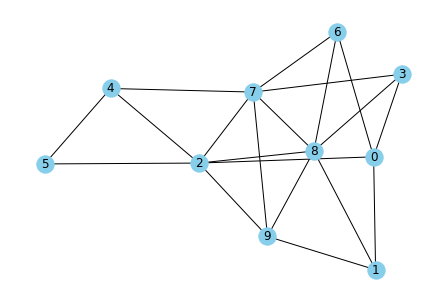

In [40]:
#pre-conditions: n > k
def simple_watts_storgatz(n, k, p): # n = #nodes to create, k = avg. degree, p = prob. for recreating the edge.
    g = nx.Graph()
    watts_storgatz_step_one(g, n, k)
    print("Watts-Storgatz Step 1:")
    nx.draw(g, with_labels=True, node_color="skyblue")
    nx.circular_layout(g)
    plt.show()
    watts_storgatz_step_two(g, n, p)
    print("Watts-Storgatz Step 2 (FINAL):")
    nx.draw(g, with_labels=True, node_color="skyblue")
    nx.circular_layout(g)
    plt.show()

def watts_storgatz_step_one(g, n, k):
    num_neighbors_to_connect_with = k//2
    list_of_nodes = []
    for i in range(n):
        g.add_node(i)
        list_of_nodes.append(i)
    for i in range(n):
        for j in range(1, num_neighbors_to_connect_with+1):
            g.add_edge(i, list_of_nodes[(i+j)%n])
            g.add_edge(i, list_of_nodes[i-j]%n)
    return g

def watts_storgatz_step_two(g, n, p):
    m = g.number_of_edges()
    decisions = np.random.choice([0, 1], size=m, p=[p, 1-p])
    original_edges = g.copy().edges()
    all_edges = all_possible_edges(n)
    exists_edges = [edge for edge in original_edges]
    wanna_be_edges = [(u,v) for (u,v) in all_edges if (u,v) not in original_edges]
    for i, edge in enumerate(original_edges):
        if decisions[i] == 0:
            g.remove_edge(*edge)
            edge_to_be = random.choice(wanna_be_edges)
            g.add_edge(*edge_to_be)
            wanna_be_edges.remove(edge_to_be)
            exists_edges.append(edge_to_be)
            #keeps number of edges always the same, maintaining the same avg. degree (k as the original graph) in each iteration.

def all_possible_edges(n):
    all_deges = []
    for u in range(n):
        for v in range(u+1, n):
            all_deges.append((u,v))
    return all_deges

#Running Example
n = 10
k = 4
p = 0.5
print(f"Running Example for n={n}, k={k}, p={p}:")
simple_watts_storgatz(n, k, p)

b. Implement a function that computes the clustering coefficient of a given graph.

In [41]:
def average_clustering_coefficient(g):
    n = g.number_of_nodes()
    sum_ci = sum(single_node_clustering_coefficient(g, i) for i in g.nodes)
    return sum_ci/n # avg_cc = sum(ci)/n

def single_node_clustering_coefficient(g, node):
    coeff = 0
    num_of_neighbors = g.degree[node]
    neighbors = g.neighbors(node)
    for v in neighbors:
        neighbors = g.neighbors(node)
        for u in neighbors: #counting each edge twice.
            if g.has_edge(v, u):
                coeff += 1
    if num_of_neighbors > 1:
        coeff = coeff / (num_of_neighbors*(num_of_neighbors-1)) # 2*(#edges_between_the_neighbors)/ki*(ki–1)
    return coeff

### Q2
a. Implement the Degree, Betweenness and Closeness centrality measures.

In [42]:
def degree_centrality(g):
    dict = {}
    n = g.number_of_nodes()
    normalization_factor = n-1
    if n <= 1:
        return 0
    for node in g.nodes():
        degree_centrality = g.degree[node] / normalization_factor
        dict[node] = degree_centrality
    return dict

def betweenness_centrality(g):
    dict = {}
    n = g.number_of_nodes()
    nodes = g.nodes()
    normalization_factor = 2 / ((n-1)*(n-2))
    for node in nodes:
        betweenness = 0
        for i, v in enumerate(nodes):
            if v == node: continue
            for j, u in enumerate(nodes):
                total_paths = 0
                node_paths = 0
                if j <= i: continue
                if u == node: continue
                try:
                    shortest_paths = nx.all_shortest_paths(g,v,u)
                    for path in shortest_paths:
                        total_paths += 1
                        if node in path:
                            node_paths += 1
                    betweenness += node_paths / total_paths
                except:
                    pass
        betweenness = betweenness * normalization_factor
        dict[node] = betweenness
    return dict

def closeness_centrality(g):
    dict = {}
    n = g.number_of_nodes()
    nodes = g.nodes()
    distances = {}
    normalization_factor = n-1
    for u in nodes:
        closeness = 0
        for v in nodes:
            if v == u: continue
            if (v, u) in distances:
                closeness += distances[(v, u)]
            else:
                try:
                    shortest_path = len(nx.shortest_path(g, u, v)) - 1
                except:
                    shortest_path = 0
                closeness += shortest_path
                distances[(v, u)] = shortest_path
        if closeness != 0:
            closeness = normalization_factor / closeness
        dict[u] = closeness
    return dict

b. Run these measures on a random Gnp network with n=22 and p=0.3 and report top-3 nodes according to each of the measures.

c. Visualize this network using different centrality measures by changing node sizes based on the centrality measure value of each node.

Top 3 nodes according to Degree centrality :
Node 	 Score
7 	 0.48
19 	 0.43
5 	 0.38


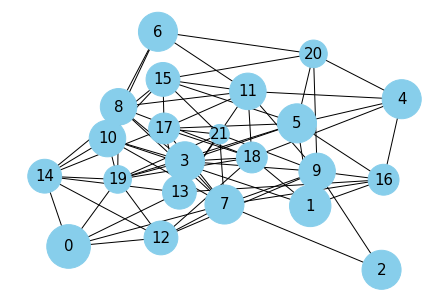

Top 3 nodes according to Betweenness centrality :
Node 	 Score
7 	 0.11
9 	 0.08
11 	 0.07


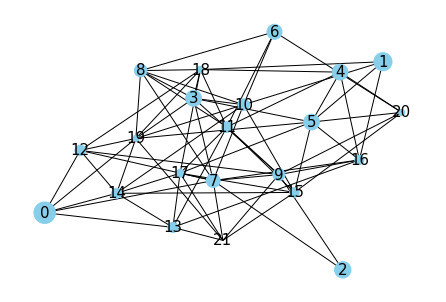

Top 3 nodes according to Closeness centrality :
Node 	 Score
7 	 0.66
9 	 0.62
11 	 0.62


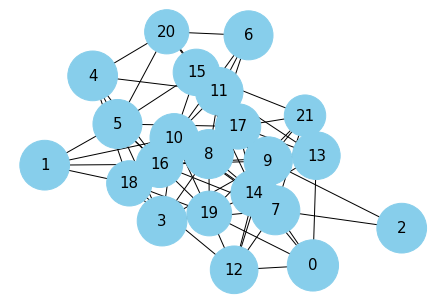

In [46]:
def print_top_k_in_each_measure(g, k):
    measures = [degree_centrality, betweenness_centrality, closeness_centrality]

    for measure in measures:
        dict = measure(g)
        results_as_list = [(k, v) for k, v in dict.items()]
        results_as_list.sort(key = lambda item: item[1], reverse=True)
        measure_name = str(measure).split()
        print(f"Top {k} nodes according to", measure_name[1].capitalize().replace("_", " "),":")
        print("Node","\t", "Score")
        for item in results_as_list[:k]:
            print(item[0],"\t", round(item[1], 2))
        nx.draw(g, with_labels=True, font_size=15, node_size=[b*4000 for a,b in results_as_list], node_color="skyblue")
        plt.show()

def run_example():
    n = 22
    p = 0.3
    g = nx.gnp_random_graph(n, p)
    print_top_k_in_each_measure(g, 3)

run_example()

### Q3
a. Implement check_balance(G) function that checks balance (according to “Theory of Structural Balance”) of a G. Explain your implementation decision.

In [47]:
def check_balance(g):
    edges = g.edges(data=True)
    positive_edges = [(u, v) for (u, v, d) in edges if d['label'] == '+']
    negative_edges = [(u, v) for (u, v, d) in edges if d['label'] == '-']

    #creates positive edges subgraph
    sub_g_positive = nx.Graph()
    sub_g_positive.add_nodes_from(g.nodes())
    sub_g_positive.add_edges_from(positive_edges)
    connected_components = list(nx.connected_components(sub_g_positive)) #makes a list form the nx generator for connected component sets.

    #creates a super graph - nodes are positive connected component and edges are negative ones between or inside them.
    super_graph = nx.Graph()
    for connected_component in connected_components:
        super_graph.add_node(frozenset(connected_component)) 
        #uses forzenset cause it's hashable (not as regular set). This property is needed for nx.graph.add_node().

    for u, v in negative_edges:
        super_u = frozenset()
        super_v = frozenset()
        for connected_component in connected_components:
            #checks if one of the connected component contains a negative edge in it, thus the original graph is unbalanced.
            if u in connected_component and v in connected_component:
                return False
        #creates edges for the super graph.
            if u in connected_component and v not in connected_component:
                super_u = frozenset(connected_component)
            if u not in connected_component and v in connected_component:
                super_v = frozenset(connected_component)
        if len(super_u) > 0 and len(super_v) > 0:
            super_graph.add_edge(super_u, super_v)
    #checks if the super graph is bipartite, thus the original graph is balanced.
    if nx.is_bipartite(super_graph):
        return True
    else:
        return False

b. Think about a real-world example of a signed social network (up to 10 nodes) that is balanced according to the “Theory of Structural Balance”. Present the network, explain the nodes and the edges. Show (by splitting it into two coalitions of by completing it) that the graph is balanced.

c. Visualize the network from (b) using different colors for positive and negative edges. Run the algorithm implemented in (a) to demonstrate that the network is balanced.

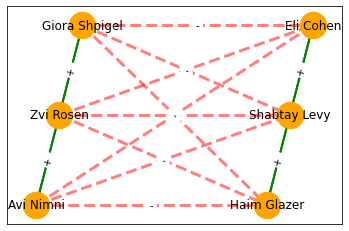

In [51]:
#This is a graph of past players at Maccabi and Hapoel. 
#Each player wants his team to win (positive edges with his team members)
#and the opposing team to lose (negative edges with opposing team members).

def create_maccabi_hapoel_graph():
    #The players of each team want their team to win and the other to lose in league.
    g = nx.Graph()
    #Maccabi team
    maccabi = ["Avi Nimni", "Zvi Rosen", "Giora Shpigel"]
    #Hapoel team
    hapoel = ["Haim Glazer", "Shabtay Levy", "Eli Cohen"]
    all_players = maccabi + hapoel
    for player in all_players:
        g.add_node(player)
    for u in range(len(all_players)):
        for v in range(u+1,len(all_players)):
            g.add_edge(all_players[u], all_players[v])
    labels_of_edges = dict()
    for u, v in g.edges():
        if (u in maccabi and v in maccabi) or (u in hapoel and v in hapoel):
            labels_of_edges[(u, v)] = '+'
        else: 
            labels_of_edges[(u, v)] = '-'
    nx.set_edge_attributes(g, values=labels_of_edges, name='label')
    return g, maccabi, hapoel

def draw_graph(g, maccabi, hapoel):
    edges = g.edges(data=True)
    positive_edges = [(u, v) for (u, v, d) in edges if d['label'] == '+']
    negative_edges = [(u, v) for (u, v, d) in edges if d['label'] == '-']
    # Retrieve the positions from graph nodes and save to a dictionary
    pos = {}
    pos.update((n, (1+i/10, i)) for i, n in enumerate(maccabi))
    pos.update((n, (2+i/10, i)) for i, n in enumerate(hapoel))
    # Draw nodes
    nx.draw_networkx_nodes(g,pos,node_size=700, node_color='orange')
    # Draw edges
    nx.draw_networkx_edges(g,pos,edgelist=positive_edges, width=2, edge_color='g')
    nx.draw_networkx_edges(g,pos,edgelist=negative_edges, width=3,
                        alpha=0.5,edge_color='r', arrows=False,style='dashed')
    # Draw node labels
    nx.draw_networkx_labels(g,pos)
    # Draw edge labels
    edge_labels = dict([((u, v), d['label']) for u, v, d in g.edges(data=True)])
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    plt.show() # display

g, maccabi, hapoel = create_maccabi_hapoel_graph()
draw_graph(g, maccabi, hapoel)